In [69]:
from utils import *
import matplotlib.pyplot as plt

In [70]:
# define the hamiltonian of one dimensional transverse Ising model with length N
def ising_hamiltonian(N, h, J):
    # define the Pauli matrices
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    
    # define the identity matrix
    I = np.eye(2)
    
    # define the hamiltonian
    H = np.zeros((2**N, 2**N))
    for i in range(N):
        H += -h * np.kron(np.kron(np.eye(2**i), sigma_x), np.eye(2**(N-i-1)))
    for i in range(N-1):
        H += -J * np.kron(np.kron(np.eye(2**i), np.kron(sigma_z, sigma_z)), np.eye(2**(N-i-2)))
    return H


In [71]:
# define the hamiltonian of one dimensional Hessenberg model with length N
def hessenberg_hamiltonian(N, J):
    # define the Pauli matrices
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    
    # define the identity matrix
    I = np.eye(2)
    
    # define the hamiltonian
    H = np.zeros((2**N, 2**N), dtype=complex)
    for i in range(N-1):
        H += -J * np.kron(np.kron(np.eye(2**i), np.kron(sigma_x, sigma_x)), np.eye(2**(N-i-2)))
        H += -J * np.kron(np.kron(np.eye(2**i), np.kron(sigma_y, sigma_y)), np.eye(2**(N-i-2)))
        H += -J * np.kron(np.kron(np.eye(2**i), np.kron(sigma_z, sigma_z)), np.eye(2**(N-i-2)))
    return H

In [72]:
h=1
J=1
tmp = ising_hamiltonian(5, h, J)
bias = np.trace(np.abs(tmp))
tmp += bias * np.eye(2**5)
# find the ground state energy with qr algorithm
Ak, Bk, recorder = qr_algorithm(tmp, record=True)
true_energy_spectral = np.sort(np.linalg.eig(tmp)[0]) - bias
print(f'the ground state energy of 1D transverse Ising model is {np.min(np.diag(Ak)) - bias}')
print(f'the relative error of solution is {np.linalg.norm(np.sort(np.diag(Ak)) - bias - true_energy_spectral) / np.linalg.norm(true_energy_spectral)}')


iteration 0 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done
iteration 25 done
iteration 26 done
iteration 27 done
iteration 28 done
iteration 29 done
iteration 30 done
iteration 31 done
iteration 32 done
iteration 33 done
iteration 34 done
iteration 35 done
iteration 36 done
iteration 37 done
iteration 38 done
iteration 39 done
iteration 40 done
iteration 41 done
iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done
iteration 50 done
iteration 51 done
iteration 52 done
iteration 53 done
iteration 54 done
iteration 55 done
it

/opt/anaconda3/envs/qiskit/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


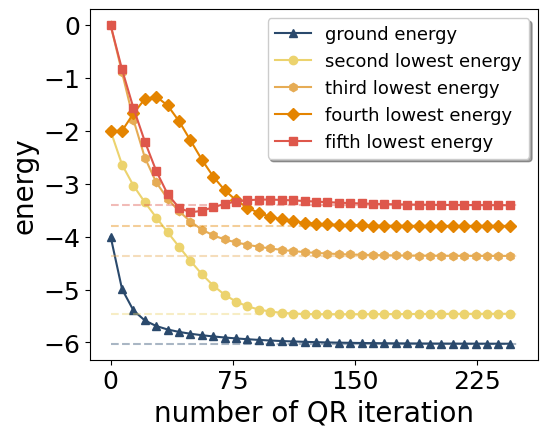

In [73]:
final_spectral = np.diag(Ak) - bias
# find first 5 lowest energy level index
index = np.argsort(final_spectral)[:5]
min_energy_record = []
second_min_energy_record = []
third_min_energy_record = []
fourth_min_energy_record = []
fifth_min_energy_record = []
for i in range(0, int(len(recorder)/4), 7):
    min_energy_record.append(recorder[i][index[0]] - bias)
    second_min_energy_record.append(recorder[i][index[1]] - bias)
    third_min_energy_record.append(recorder[i][index[2]] - bias)
    fourth_min_energy_record.append(recorder[i][index[3]] - bias)
    fifth_min_energy_record.append(recorder[i][index[4]] - bias)
x = np.arange(0, int(len(recorder)/4), 7)
plt.plot(x, min_energy_record, label='ground energy',marker='^',color='#2A496C')
plt.plot(x, second_min_energy_record, label='second lowest energy', marker='o',color='#ECD36E')
plt.plot(x, third_min_energy_record, label='third lowest energy', marker='h',color='#E6AC55')
plt.plot(x, fourth_min_energy_record, label='fourth lowest energy', marker='D',color='#E48400')
plt.plot(x, fifth_min_energy_record, label='fifth lowest energy', marker='s',color='#DE574B')
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[0], true_energy_spectral[0]], color='#2A496C', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[1], true_energy_spectral[1]], color='#ECD36E', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[2], true_energy_spectral[2]], color='#E6AC55', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[3], true_energy_spectral[3]], color='#E48500', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[4], true_energy_spectral[4]], color='#DE574B', linestyle='--', alpha=0.4)
plt.xlabel('number of QR iteration', fontsize = 20)
plt.ylabel('energy',fontsize=20)
#plt.title('convergence of Ising energy spectrum using QR algorithm')
plt.legend(shadow=True, fontsize=13)
plt.xticks([0, 75, 150, 225], fontsize=18)
plt.yticks([-6, -5, -4, -3, -2, -1, 0], fontsize=18)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig('./figures/Ising_convergence.pdf', dpi=300, format='pdf')

In [74]:
print('energy spectrum of 1D transverse Ising model with N=5 using QR algorithm')
calculated = np.real(np.sort(np.diag(Ak)) - bias)
print(np.real(np.sort(np.diag(Ak)) - bias))

print('energy spectrum of 1D transverse Ising model with N=5 using exact diagonalization')
correct = np.real(np.sort(np.linalg.eig(tmp)[0]) - bias)
print(np.real(np.sort(np.linalg.eig(tmp)[0]) - bias))

energy spectrum of 1D transverse Ising model with N=5 using QR algorithm
[-6.02667418 -5.45741483 -4.36501413 -3.79575478 -3.40723125 -2.83797189
 -2.4709027  -2.18867816 -2.0924007  -1.7455712  -1.38012085 -1.36706919
 -1.00000346 -0.5270422  -0.4307616  -0.2815389   0.23131135  0.43081135
  0.5270422   1.00000044  1.18773397  1.43035254  1.7455712   2.09240069
  2.18862731  2.65023792  2.83797189  3.40723125  3.79575478  4.36501413
  5.45741483  6.02667418]
energy spectrum of 1D transverse Ising model with N=5 using exact diagonalization
[-6.02667418 -5.45741483 -4.36501413 -3.79575478 -3.40723125 -2.83797189
 -2.66166005 -2.18870229 -2.0924007  -1.7455712  -1.61944294 -1.17631184
 -1.         -0.52704224 -0.43074065 -0.04221712  0.04221712  0.43074065
  0.52704224  1.          1.17631184  1.61944294  1.7455712   2.0924007
  2.18870229  2.66166005  2.83797189  3.40723125  3.79575478  4.36501413
  5.45741483  6.02667418]


In [75]:
calculated_ising = calculated
correct_ising = correct
# for drawing

In [76]:
# the same for Hessenberg model
tmp = hessenberg_hamiltonian(5, 1)
bias = np.trace(np.abs(tmp))
tmp += bias * np.eye(2**5)
# find the ground state energy with qr algorithm
Ak, Bk, recorder = qr_algorithm(tmp, record=True)
true_energy_spectral = np.sort(np.linalg.eig(tmp)[0]) - bias
print(np.sort(np.diag(Ak))-bias)
print(true_energy_spectral)
print(f'the ground state energy of 1D Hessenberg model is {np.min(np.diag(Ak)) - bias}')
print(f'the relative error of solution is {np.linalg.norm(np.sort(np.diag(Ak)) - bias - true_energy_spectral) / np.linalg.norm(true_energy_spectral)}')

iteration 0 done
iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done
iteration 25 done
iteration 26 done
iteration 27 done
iteration 28 done
iteration 29 done
iteration 30 done
iteration 31 done
iteration 32 done
iteration 33 done
iteration 34 done
iteration 35 done
iteration 36 done
iteration 37 done
iteration 38 done
iteration 39 done
iteration 40 done
iteration 41 done
iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done
iteration 50 done
iteration 51 done
iteration 52 done
iteration 53 done
iteration 54 done
iteration 55 done
it

/opt/anaconda3/envs/qiskit/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


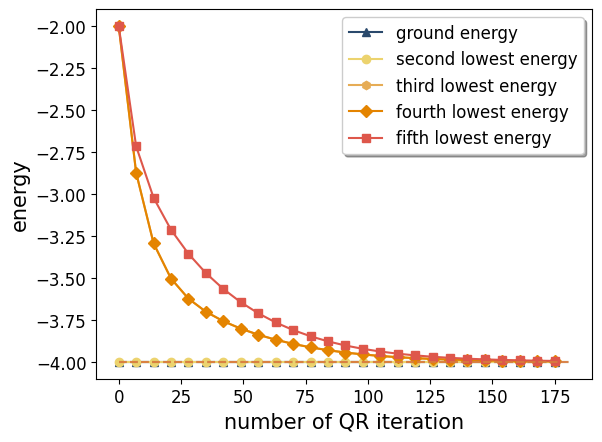

In [77]:
# same figure for Hessenberg model
final_spectral = np.diag(Ak) - bias
index = np.argsort(final_spectral)[:5]
min_energy_record = []
second_min_energy_record = []
third_min_energy_record = []
fourth_min_energy_record = []
fifth_min_energy_record = []
for i in range(0, int(len(recorder)/4), 7):
    min_energy_record.append(recorder[i][index[0]] - bias)
    second_min_energy_record.append(recorder[i][index[1]] - bias)
    third_min_energy_record.append(recorder[i][index[2]] - bias)
    fourth_min_energy_record.append(recorder[i][index[3]] - bias)
    fifth_min_energy_record.append(recorder[i][index[4]] - bias)
x = np.arange(0, int(len(recorder)/4), 7)
plt.plot(x, min_energy_record, label='ground energy',marker='^',color='#2A496C')
plt.plot(x, second_min_energy_record, label='second lowest energy', marker='o',color='#ECD36E')
plt.plot(x, third_min_energy_record, label='third lowest energy', marker='h',color='#E6AC55')
plt.plot(x, fourth_min_energy_record, label='fourth lowest energy', marker='D',color='#E48400')
plt.plot(x, fifth_min_energy_record, label='fifth lowest energy', marker='s',color='#DE574B')
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[0], true_energy_spectral[0]], color='#2A496C', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[1], true_energy_spectral[1]], color='#ECD36E', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[2], true_energy_spectral[2]], color='#E6AC55', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[3], true_energy_spectral[3]], color='#E48500', linestyle='--', alpha=0.4)
plt.plot([0, int(len(recorder)/4)], [true_energy_spectral[4], true_energy_spectral[4]], color='#DE574B', linestyle='--', alpha=0.4)
plt.xlabel('number of QR iteration', fontsize = 15)
plt.ylabel('energy',fontsize=15)
#plt.title('convergence of Hessenberg energy spectrum using QR algorithm')
plt.legend(shadow=True, fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('./figures/Hessenberg_convergence.png')

In [78]:
# the same for Hessenberg model
print('energy spectrum of 1D Hessenberg model with N=5 using QR algorithm')
calculated = np.real(np.sort(np.diag(Ak)) - bias)
print(np.real(np.sort(np.diag(Ak)) - bias))

print('energy spectrum of 1D Hessenberg model with N=5 using exact diagonalization')
correct = np.real(np.sort(np.linalg.eig(tmp)[0]) - bias)
print(np.real(np.sort(np.linalg.eig(tmp)[0]) - bias))

energy spectrum of 1D Hessenberg model with N=5 using QR algorithm
[-4.         -4.         -4.         -4.         -4.         -4.
 -3.23606798 -3.23606798 -3.23606798 -3.23606798 -2.35481936 -2.35481936
 -1.23606798 -1.23606798 -1.23606732 -1.2360642  -0.8284309  -0.82842778
  1.23606798  1.23606798  1.23606798  1.23606798  2.64327435  2.64329188
  3.23605045  3.23606797  3.23606798  3.23606798  4.82842712  4.82842712
  7.71154501  7.71154501]
energy spectrum of 1D Hessenberg model with N=5 using exact diagonalization
[-4.         -4.         -4.         -4.         -4.         -4.
 -3.23606798 -3.23606798 -3.23606798 -3.23606798 -2.35481936 -2.35481936
 -1.23606798 -1.23606798 -1.23606798 -1.23606798 -0.82842712 -0.82842712
  1.23606798  1.23606798  1.23606798  1.23606798  2.64327435  2.64327435
  3.23606798  3.23606798  3.23606798  3.23606798  4.82842712  4.82842712
  7.71154501  7.71154501]


In [79]:
calculated_hessenberg = calculated
correct_hessenberg = correct

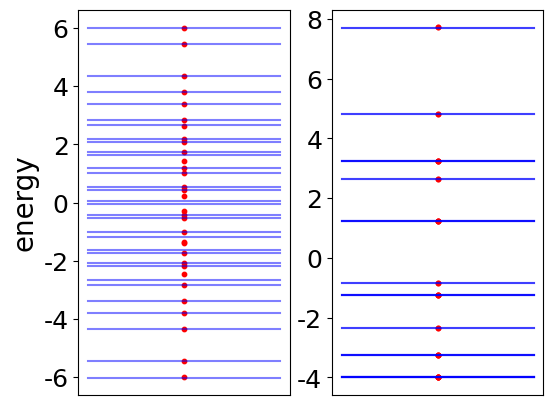

In [82]:
#plot the exact energy spectrum with 32 lines, each line represents one energy level
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(6, 5))
for i in range(32):
    tmp_x_ising = np.linspace(-1, 1, 100)
    tmp_y_ising = np.zeros(100) + correct_ising[i]
    ax1.plot(tmp_x_ising, tmp_y_ising, color='blue', alpha=0.5)

for i in range(32):
    ax1.scatter(0, calculated_ising[i], color='red', s=10)

ax1.set_ylabel('energy',fontsize=20)
ax1.set_xticks([])
ax1.set_yticks([-6, -4, -2, 0,2,4,6])
ax1.set_yticklabels([-6, -4, -2, 0,2,4,6], fontsize=18)


# plt.ylabel('energy',fontsize=20)
# plt.xticks([])
# plt.yticks(fontsize=15)
# #plt.title(f'h={h}, J={J}', fontsize=20)
# plt.savefig('./figures/Ising_energy_spectrum.png', dpi=300)
# plt.show()

#plot the exact energy spectrum with 32 lines, each line represents one energy level
for i in range(32):
    tmp_x_hess = np.linspace(-1, 1, 100)
    tmp_y_hess = np.zeros(100) + correct_hessenberg[i]
    ax2.plot(tmp_x_hess, tmp_y_hess, color='blue', alpha=0.5)

for i in range(32):
    ax2.scatter(0, calculated_hessenberg[i], color='red', s=10)

ax2.set_xticks([])
ax2.set_yticks([-4, -2, 0,2,4,6, 8])
ax2.set_yticklabels([-4, -2, 0,2,4,6,8], fontsize=18)

plt.savefig('./figures/energy_spectrum.pdf', dpi=300, format='pdf')

# plt.ylabel('energy',fontsize=20)
# plt.xticks([])
# plt.yticks(fontsize=15)
# #plt.title(f'J={1}', fontsize=20)
# plt.savefig('./figures/Hessenberg_energy_spectrum.png', dpi=300)
# plt.show()